In [5]:
print('hello world')

hello world


# Cluster station notebook

## The challenge
Looking only at the weather data (that is, don’t include the latitude/longitude of the
weather station) can you use a clustering algorithm to see if these stations can be clustered
into groups that have “similar” weather? 
Note that you will have multiple weather readings for each station. 
* You could pick the most recent, an average, an extreme, 
* or you could potentially consider all of the points individually and look for clusters in the individual observations. 

__You should try to justify your choice__


In [7]:
import pandas as pd

In [9]:
dataPath = '../data/weather/'

In [11]:
stationData = pd.DataFrame.from_csv(dataPath+'stationData.csv',index_col=[0,1,2],parse_dates=False)
stationData

af   rain    sun  tmax  tmin
station   yyyy   mm                                  
aberporth 1941.0 1.0    NaN   74.7    NaN   NaN   NaN
                 2.0    NaN   69.1    NaN   NaN   NaN
                 3.0    NaN   76.2    NaN   NaN   NaN
                 4.0    NaN   33.7    NaN   NaN   NaN
                 5.0    NaN   51.3    NaN   NaN   NaN
                 6.0    NaN   25.7    NaN   NaN   NaN
                 7.0    NaN   53.9    NaN   NaN   NaN
                 8.0    NaN   91.8    NaN   NaN   NaN
                 9.0    NaN   25.5    NaN   NaN   NaN
                 10.0   NaN  106.2    NaN   NaN   NaN
                 11.0   NaN   92.3    NaN   NaN   NaN
                 12.0   NaN   86.5    NaN   NaN   NaN
          1942.0 1.0    NaN  114.0   58.0   5.8   2.1
                 2.0    NaN   13.8   80.3   4.2   0.6
                 3.0    NaN   58.0  117.9   9.7   3.7
                 4.0    NaN   42.5  200.1  13.1   5.3
                 5.0    NaN  101.1  215.1  14.0   6.9
                 6.0    NaN    2.3  269.3  16.2   9.9
                 7.0    NaN   70.2  185.0  17.4  11.3
                 8.0    NaN   78.5  141.9  18.7  12.3
                 9.0    NaN  146.8  129.1  16.4  10.7
                 10.0   NaN  131.1   82.1  13.1   8.2
                 11.0   NaN   19.8   62.9   9.2   4.6
                 12.0   NaN  183.9   31.4   9.6   6.2
          1943.0 1.0    NaN  176.7   41.4   8.2   3.5
                 2.0    NaN   65.4   68.6   8.9   4.6
                 3.0    NaN   21.0  156.2  10.2   4.1
                 4.0    NaN   39.4  178.3  13.0   6.8
                 5.0    NaN   83.5  233.3  14.1   7.4
                 6.0    NaN   58.7  223.8  15.9   9.8
...                     ...    ...    ...   ...   ...
yeovilton 2018.0 1.0    6.0   69.2   55.1  10.2   2.8
                 2.0   15.0   28.4  129.3   7.3   0.1
                 3.0    9.0  121.4   82.6   9.3   2.1
                 4.0    0.0   58.4   99.1  14.2   7.2
                 5.0    0.0   45.4  221.6  19.0   7.4
                 6.0    0.0    5.6  248.3  22.8  11.6
                 7.0    0.0   13.8  242.3  25.9  13.5
                 8.0    0.0   53.8  138.5  22.6  12.8
                 9.0    0.0   36.4  149.0  19.6   9.4
                 10.0   4.0   51.8  132.8  15.4   6.2
                 11.0   4.0  102.6   73.8  12.1   5.3
                 12.0   2.0   94.2   27.2  11.0   5.3
          2019.0 1.0   14.0   33.8   53.2   7.8   1.0
                 2.0   10.0   47.2  111.4  11.8   1.9
                 3.0    2.0   66.0  110.0  12.3   4.8
                 4.0    2.0   49.4  155.2  14.8   4.7
                 5.0    2.0   17.6  197.3  17.3   6.1
                 6.0    0.0   69.2  141.6  19.4  10.4
                 7.0    0.0   14.8  221.1  24.0  12.6
                 8.0    0.0   38.4  176.6  22.6  12.4
                 9.0    0.0   83.8  155.3  19.9  11.0
                 10.0   1.0  112.4   69.0  14.9   7.6
                 11.0   4.0   87.0   45.9  10.4   4.3
                 12.0   7.0  139.4   56.7  10.3   3.2
          2020.0 1.0    5.0   55.8   44.0   9.6   4.1
                 2.0    2.0  117.4   63.1  10.8   4.5
                 3.0    6.0   43.4  159.2  11.5   3.0
                 4.0    3.0   39.8  235.0  17.5   5.3
                 5.0    2.0    3.6  305.6  19.7   6.8
                 6.0    0.0  103.0  187.6  20.5  11.0

[37770 rows x 5 columns]

In [ ]:
df = stationData
#display(df.reset_index())
infer_type = lambda x: pd.api.types.infer_dtype(x, skipna=True)
#df.reset_index().apply(pd.to_numeric, errors='ignore')
print(pd.__version__)
#df.reset_index().convert_dtypes()

I'm going to average each month year-by-year. This is because we can see that from a month to month basis, the value changes by quite a bit, which is pretty important data that we don't want to smooth out. 
Taking an average for a given month means that we don't get a skew from lots of data samples (some stations have a lot more historical data than others.)
If we were to take an average yearly value (averageing all the calendar months then averaging over the range of data) then if we're missing a month of data for a given year, we skew the result quite significantly. (If you miss out July, then you're going to get a lot more colder bias for that year, which is wrong. )

I'm not sure how to treat station moves just yet. For now, i'll keep it in since it'd only have a slight bias. 



42
42


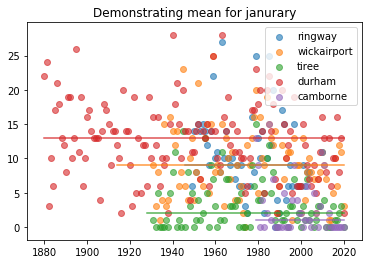

In [100]:
# See
# Getting rid of index makes it a lot easier to slice and manipulate.
df = stationData.reset_index()
#df = 
df_jan = df[df['mm']==1.0]#[df['yyyy']>2010]
print(len(x))
print(len(y))
import matplotlib.pyplot as plt
for station in list(set(df_jan['station']))[0:5]:
#    #print(y.loc[station,:])
    this_df = df_jan[df_jan['station']==station]
    x= this_df['yyyy']
    y= this_df.set_index('yyyy')
    y = y[['af','rain','sun','tmax','tmin']]
    #print(station)
    if len(y) :
        #print(y)
        plt.scatter(x,y['af'],label=station, alpha=0.6)
        plt.plot(x,[y['af'].median()]*len(x), alpha=0.8)
plt.legend()
plt.title('Demonstrating mean for janurary')
plt.show()
#    #print(y['af'])

42
42


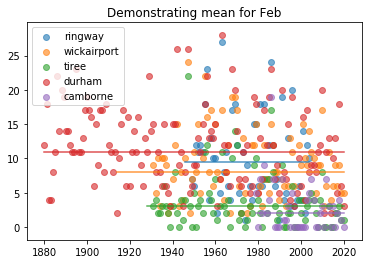

In [101]:
# See
# Getting rid of index makes it a lot easier to slice and manipulate.
df = stationData.reset_index()
#df = 
df_jan = df[df['mm']==2.0]#[df['yyyy']>2010]
print(len(x))
print(len(y))
import matplotlib.pyplot as plt
for station in list(set(df_jan['station']))[0:5]:
#    #print(y.loc[station,:])
    this_df = df_jan[df_jan['station']==station]
    x= this_df['yyyy']
    y= this_df.set_index('yyyy')
    y = y[['af','rain','sun','tmax','tmin']]
    #print(station)
    if len(y) :
        #print(y)
        plt.scatter(x,y['af'],label=station, alpha=0.6)
        plt.plot(x,[y['af'].median()]*len(x), alpha=0.8)
plt.legend()
plt.title('Demonstrating mean for Feb')
plt.show()
#    #print(y['af'])


In [247]:
cols = (stationData.columns).values
print(cols)
idx = pd.IndexSlice
#print(stationData[stationData.index.isin([1.0,2.0],level=2)])
#[stationData.index.isin([1.0],level=2)]
#print(stationData[stationData.index.isin(['yeovilton'],level=0)])
df = stationData.reset_index()
sdict={}
dictList=[]
for station in set(df['station']):
    #print(station)
    sdf=stationData[stationData.index.isin([station],level=0)]
    mdict={}
    for month in range (1,12+1):
        month = float(month) # to replicate dataframe
        #print(month)
        mdf = sdf[sdf.index.isin([month], level=2)]
        #print(mdf.median().to_dict())
        # I don't really understand how to construct dataframe other than this.. 
        mdict = mdf.median().to_dict()
        mdict['mm'] = month
        mdict['station'] = station
        dictList.append(mdict)

    #sdict[station] = mdict

avgDict = pd.DataFrame.from_dict(dictList)
avgDict.set_index(['station','mm'],inplace=True)
#
# display(avgDict)
print(avgDict.index.get_level_values(0)[0])


firstStation = avgDict[avgDict.index.isin([avgDict.index.get_level_values(0)[0]],level=0)]
fig, ax = plt.subplots(len(avgDict.columns)+1,figsize=(8,20),sharex=True,sharey=True)
#display(avgDict) # columns
#display(avgDict/avgDict.std()) # columns
#standardize
avgDict.reset_index(inplace=True)
avgDict.set_index(['station'],inplace=True)
avgDict = avgDict/avgDict.std()
#display(avgDict)
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(avgDict).score(avgDict)
avgDict['labels'] = kmeans.labels_
display(avgDict)
for f_i,feature in enumerate(avgDict.columns.values[0]):
    print(feature)
    for station in list(set(df['station'])):

        station_df = avgDict[avgDict.index.isin([station],level=0)]
        
        #display(station_df)
        #print(station_df[feature].head())
        #print(station_df[feature].values)
        #ax[f_i].plot(station_df.index.get_level_values(1),station_df[feature], label=station )
        ax[f_i].plot(station_df['mm'],station_df[feature], label=station, c=kmeans.labels_ )
        ax[f_i].title.set_text(feature)
        #ax[f_i].plot(station_df.index.get_level_values(1),[station_df[feature].mean()]*len(station_df.index.get_level_values(1)), label=station )
fig.show()
#        print(df[df['station']==station][df['mm']==month][cols])

['af' 'rain' 'sun' 'tmax' 'tmin']
ringway


,mm,af,rain,sun,tmax,tmin,labels
station,,,,,,,
ringway,0.289356,2.255996,2.104816,0.834491,1.360649,0.446298,1
ringway,0.578713,2.381329,1.513470,1.168645,1.562621,0.500394,1
ringway,0.868069,1.253331,1.644533,1.822657,2.019714,0.757353,10
ringway,1.157425,0.375999,1.713186,2.446291,2.529957,1.230699,7
ringway,1.446782,0.000000,1.827086,3.336176,3.295322,1.947480,2
ringway,1.736138,0.000000,1.919142,3.028826,3.965017,2.772454,4
ringway,2.025494,0.000000,1.847370,2.896594,4.166988,3.245800,4
ringway,2.314851,0.000000,2.423112,2.825118,4.145728,3.245800,8
ringway,2.604207,0.000000,2.070489,2.246156,3.688635,2.718358,8


m


KeyError: 'm'

['af' 'rain' 'sun' 'tmax' 'tmin']


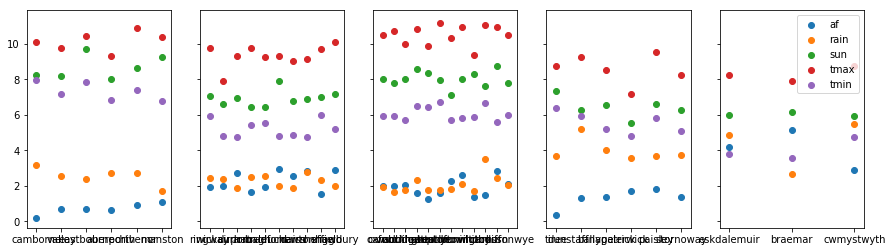

In [307]:
cols = (stationData.columns).values
print(cols)
idx = pd.IndexSlice
#print(stationData[stationData.index.isin([1.0,2.0],level=2)])
#[stationData.index.isin([1.0],level=2)]
#print(stationData[stationData.index.isin(['yeovilton'],level=0)])
df = stationData.reset_index()
sdict={}
dictList=[]
for station in set(df['station']):
    #print(station)
    sdf=stationData[stationData.index.isin([station],level=0)]
    mdict={}
    mdictList=[]
    for month in range (1,12+1):
        month = float(month) # to replicate dataframe
        #print(month)
        mdf = sdf[sdf.index.isin([month], level=2)]
        #print(mdf.median().to_dict())
        # I don't really understand how to construct dataframe other than this.. 
        mdict = mdf.median().to_dict()
        mdict['mm'] = month
        mdict['station'] = station
        mdictList.append(mdict)
    stationavg = pd.DataFrame.from_dict(mdictList)
    stationavg.set_index(['station','mm'],inplace=True)
    #print(stationavg)
    #print(stationavg.mean().to_dict())
    stationavg = stationavg.mean().to_dict()
    stationavg['station'] = station
    dictList.append(stationavg)
avgDict = pd.DataFrame.from_dict(dictList).set_index('station')
    #sdict[station] = mdict

#avgDict = pd.DataFrame.from_dict(dictList)
#avgDict.set_index(['station','mm'],inplace=True)
##
## display(avgDict)
#print(avgDict.index.get_level_values(0)[0])
#
#
#firstStation = avgDict[avgDict.index.isin(#[avgDict.index.get_level_values(0)[0]],level=0)]
#fig, ax = plt.subplots(len(avgDict.columns)+1,figsize=(8,20),#sharex=True,sharey=True)
#display(avgDict) # columns
#display(avgDict/avgDict.std()) # columns
##standardize
#avgDict.reset_index(inplace=True)
#avgDict.set_index(['station'],inplace=True)
avgDict = avgDict/avgDict.std()
##display(avgDict)
from sklearn.cluster import KMeans
clusters = 5
kmeans = KMeans(n_clusters=clusters)
kmeans.fit(avgDict).score(avgDict)
avgDict['labels'] = kmeans.labels_
#display(avgDict)
fig, ax = plt.subplots(1,clusters, figsize=(15,4),sharey=True)
for label in range(0,clusters):
    thedf = avgDict[avgDict['labels']==label]
    for f_i,feature in enumerate(avgDict.drop('labels', 1).columns.values):
        ax[label].scatter(thedf.index,thedf[feature])
plt.legend()
#plt.scatter(sumD.index,sumD, c=kmeans.labels_)
#for f_i,feature in enumerate(avgDict.columns.values[0]):
#    print(feature)
#    for station in list(set(df['station'])):
#
#        station_df = avgDict[avgDict.index.isin([station],level=0)]
#        
#        #display(station_df)
#        #print(station_df[feature].head())
#        #print(station_df[feature].values)
#        #ax[f_i].plot(station_df.index.get_level_values(1),#station_df[feature], label=station )
#        ax[f_i].plot(station_df['mm'],station_df[feature], #label=station, c=kmeans.labels_ )
#        ax[f_i].title.set_text(feature)
#        #ax[f_i].plot(station_df.index.get_level_values(1),#[station_df[feature].mean()]*len(station_df.index.get_level_values#(1)), label=station )
#fig.show()
##        print(df[df['station']==station][df['mm']==month][cols])